In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/karen_building_blocks_analysis'

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.visualization import plot_3Dscatter_pca, plot_scatter_pca, plot_cumulative_explained_variance, biplot_PCA

In [5]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

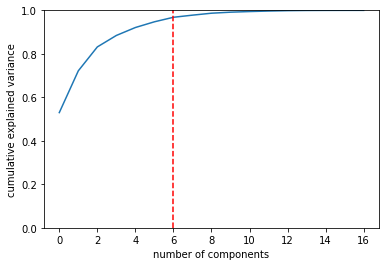

In [6]:
plot_cumulative_explained_variance(pca.explained_variance_ratio_)

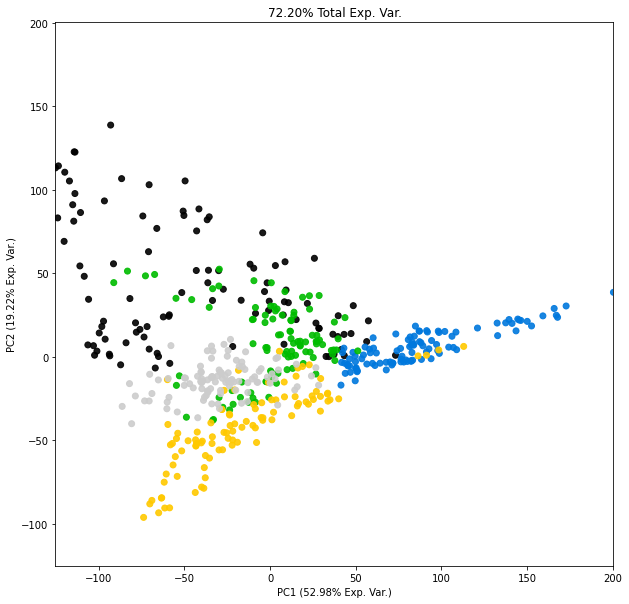

In [7]:
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patients_ids)

In [8]:
print(pca.components_[0:2, :].T.shape)
print(np.sqrt(pca.explained_variance_[0:2]).shape)

(17, 2)
(2,)


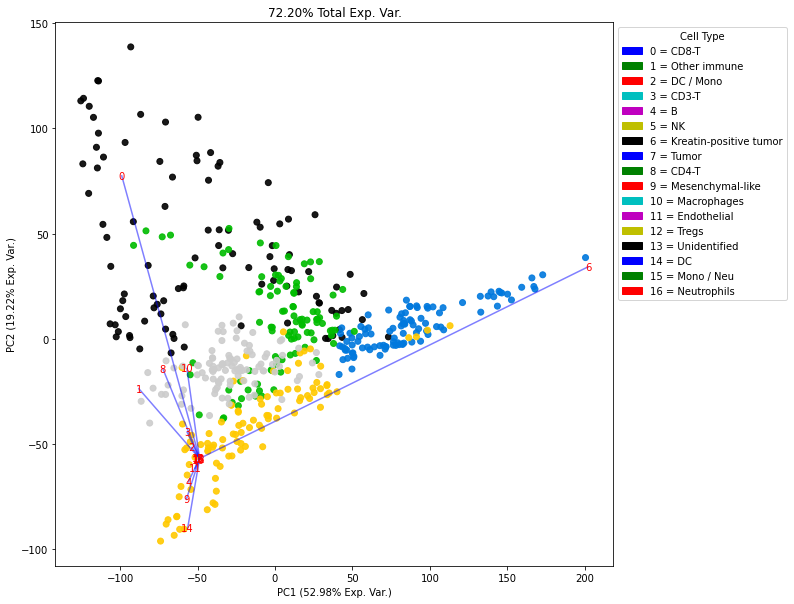

In [9]:
#Original Axis generator
original_axis = np.zeros((18, 17))
np.fill_diagonal(original_axis, np.array(sites).max(0))
original_axis_pc = pca.transform(original_axis)
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patients_ids, original_axis=original_axis_pc, cell_type=CELL_TYPES)

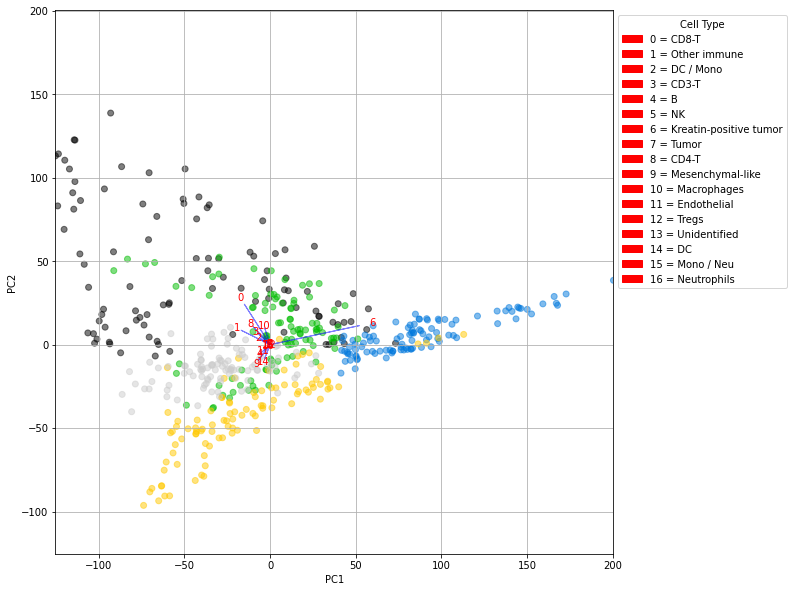

In [10]:
loadings = np.transpose(pca.components_[0:2, :])* np.sqrt(pca.explained_variance_[0:2])
biplot_PCA(pc[:,0:2], loadings, patients_ids, CELL_TYPES)

In [11]:
pca.components_

array([[-2.53629544e-01, -2.85713432e-01, -9.84664448e-02,
        -1.24339091e-01, -8.53437510e-02, -9.88678642e-03,
         8.76688571e-01, -2.70221660e-03, -1.68363511e-01,
        -1.18656121e-01, -5.34072553e-02, -5.88461098e-02,
        -2.93362792e-03, -2.04472062e-02, -5.67779999e-02,
        -1.57667890e-02, -1.65169021e-02],
       [ 6.79248841e-01,  2.42243957e-01,  1.06082897e-01,
         1.94136750e-01, -1.30734324e-01,  7.58880192e-03,
         3.18904998e-01,  7.74694510e-03,  3.03419686e-01,
        -2.70027929e-01,  2.80209720e-01, -9.26206550e-02,
         2.47796894e-03,  6.13705027e-03, -2.44598433e-01,
        -3.03834482e-03, -1.14307564e-02],
       [ 3.86327614e-01, -6.12848877e-01,  2.71941045e-02,
        -1.80221224e-02,  1.66838208e-01,  2.07682071e-02,
        -1.87125973e-02, -7.26353061e-03,  3.65223715e-01,
         1.35899343e-02, -5.17153744e-01,  6.01964353e-02,
         4.83302277e-03, -6.58886639e-02,  1.74274923e-01,
        -6.41340610e-02, -4.4

0.83% Total Exp. Var.


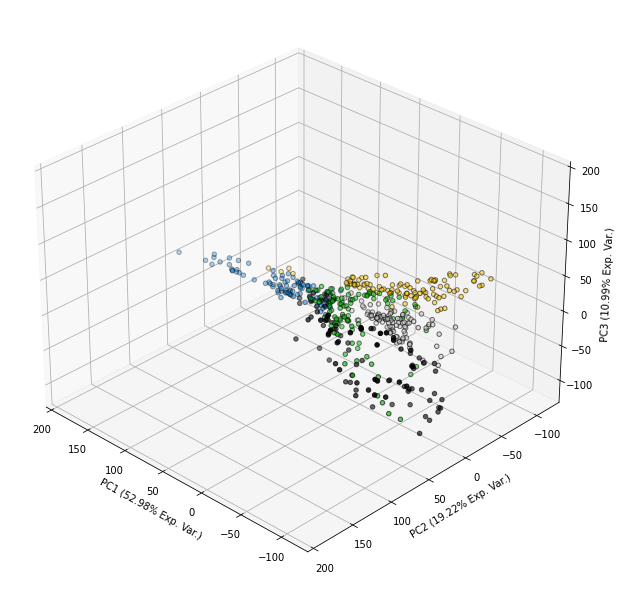

In [12]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, patients_ids)

In [4]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#full_patient_ids = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41]

N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patient_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

In [5]:
sites

array([[ 5, 11, 11, ...,  0,  0,  0],
       [ 6, 13, 20, ...,  0,  0,  1],
       [ 2,  9,  9, ...,  0,  0,  2],
       ...,
       [34, 14, 46, ...,  0, 13, 14],
       [33, 13, 47, ...,  0, 12, 13],
       [15, 12, 24, ...,  0,  6, 13]])

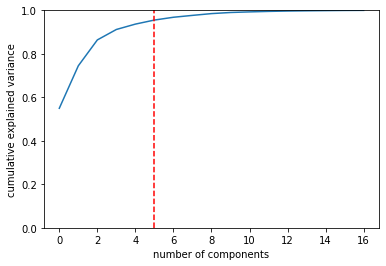

In [14]:
plot_cumulative_explained_variance(pca.explained_variance_ratio_)

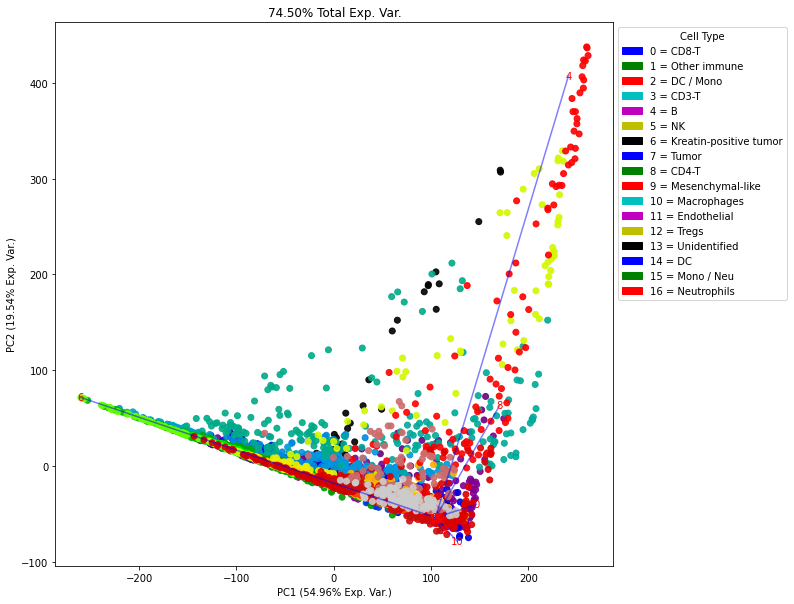

In [15]:
original_axis = np.zeros((18, 17))
np.fill_diagonal(original_axis, np.array(sites).max(0))
original_axis_pc = pca.transform(original_axis)
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patient_ids, original_axis=original_axis_pc, cell_type=CELL_TYPES)

0.86% Total Exp. Var.


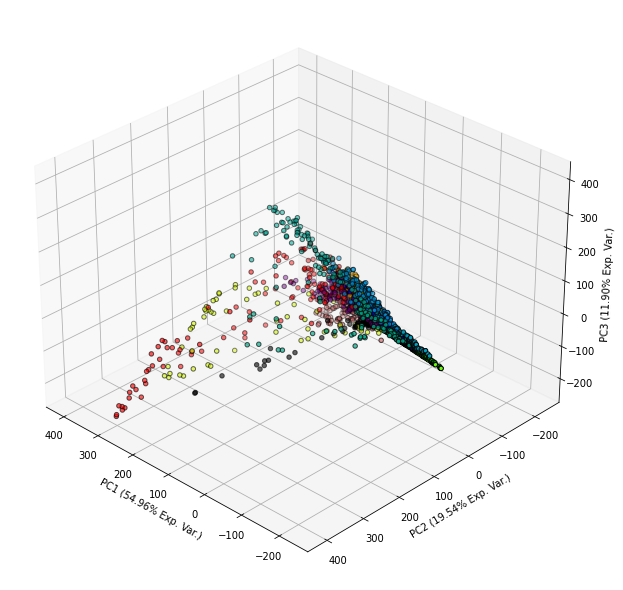

In [16]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, patient_ids)

In [16]:
pc

array([[  7.06217136,  52.41703981, -13.07750968, ...,  -2.78758045,
          6.14482922,   0.91818481],
       [ -9.08292864,  -6.23367254, -15.38013531, ...,  -0.9966509 ,
          2.81628408,   0.64213805],
       [-24.58355789,  -2.53445702, -20.43542113, ...,   1.27258037,
          2.13124969,   0.83569397],
       ...,
       [ 41.60576288, -33.97149523, -37.19384808, ...,   2.63078012,
          0.1696462 ,   0.44808956],
       [ 65.04139449, -33.80816597, -18.08755043, ...,  -0.08412208,
          1.46944719,   0.50072606],
       [ 30.37418812, -24.25452882, -15.84957396, ...,  -2.50697244,
          0.31541593,  -0.66865964]])

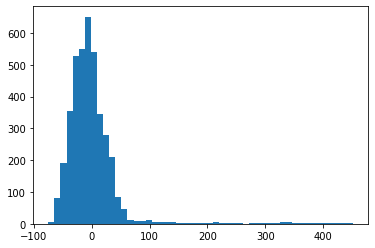

In [21]:
component = 1

plt.hist(pc[:, component], bins=50)
plt.show()